In [1]:
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv('/Users/maryambahlooli/Desktop/TRAIN 2.csv')
#test = pd.read_csv('/Users/maryambahlooli/Downloads/archive-2/TEST_FINAL.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [6]:
data_types = train.dtypes
print("\nData Types:")
print(data_types)


Data Types:
ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object


In [7]:
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})

In [8]:
train[['Store_id', 'Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(object)
train['Date'] = pd.to_datetime(train.Date)
print("Date conversion done successfully")

Date conversion done successfully


In [9]:
data_types = train.dtypes
print("\nData Types:")
print(data_types)


Data Types:
ID                       object
Store_id                 object
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                  object
Discount                 object
#Order                    int64
Sales                   float64
dtype: object


In [10]:
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


In [11]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [12]:
!pip install matplotlib
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


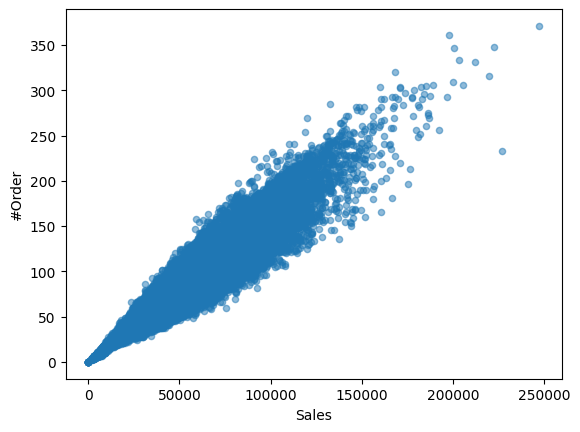

In [13]:
train.plot(kind='scatter', x='Sales', y='#Order', alpha=0.5)
plt.show()

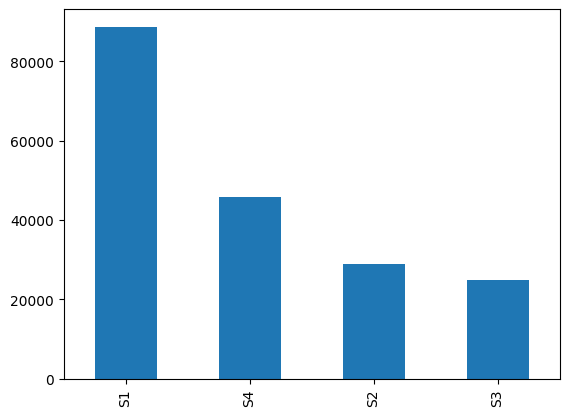

In [14]:
train['Store_Type'].value_counts().plot(kind='bar')
plt.show()

In [15]:
import seaborn as sns

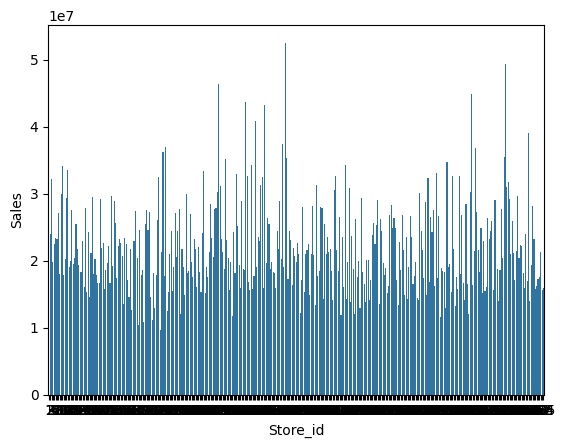

In [16]:
store_sales = train.groupby('Store_id')['Sales'].sum().reset_index()

# Create a bar plot of total sales by store
sns.barplot(x='Store_id', y='Sales', data=store_sales)
plt.show()

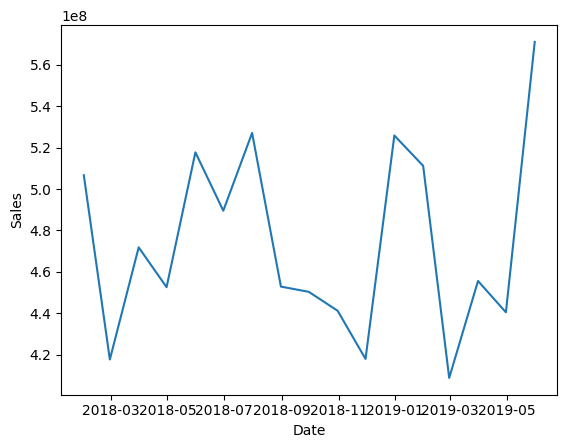

In [17]:
train['Date'] = pd.to_datetime(train['Date'])
train_sales_over_time = train.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=train_sales_over_time)
plt.show()

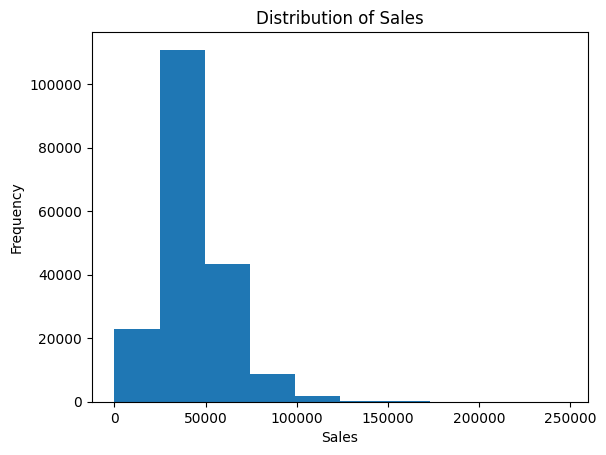

In [18]:
plt.hist(train['Sales'], bins=10)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

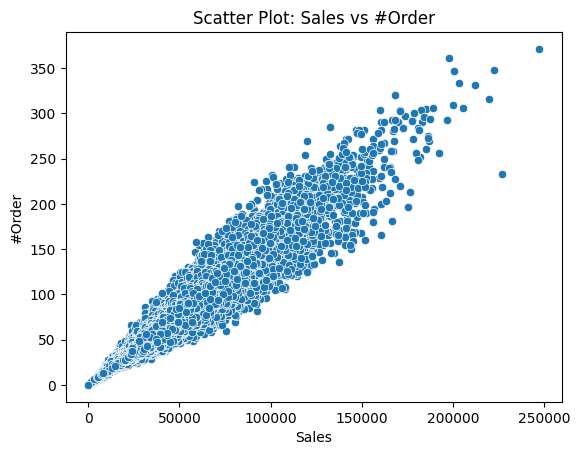

In [19]:
sns.scatterplot(x='Sales', y='#Order', data=train)
plt.xlabel('Sales')
plt.ylabel('#Order')
plt.title('Scatter Plot: Sales vs #Order')
plt.show()

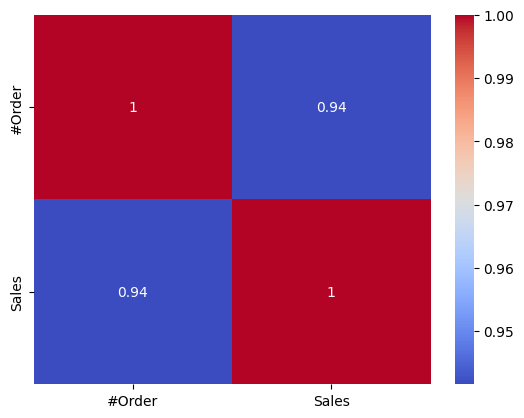

In [20]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

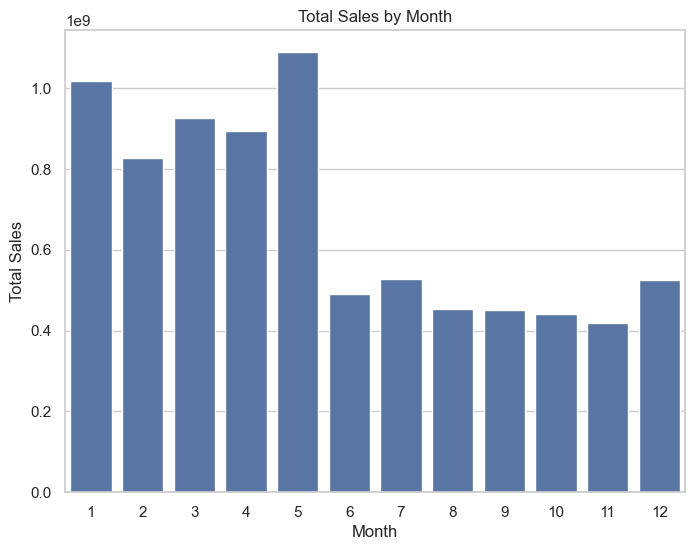

In [21]:
# Extract the month from the date column
best_month = train.copy()
best_month['Month'] = best_month['Date'].dt.month

# Group the data by month and calculate the total sales
monthly_sales = best_month.groupby('Month')['Sales'].sum().reset_index()

# Set the plot style
sns.set(style='whitegrid')

# Create a bar plot of total sales by month
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sales)

# Set the plot title and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

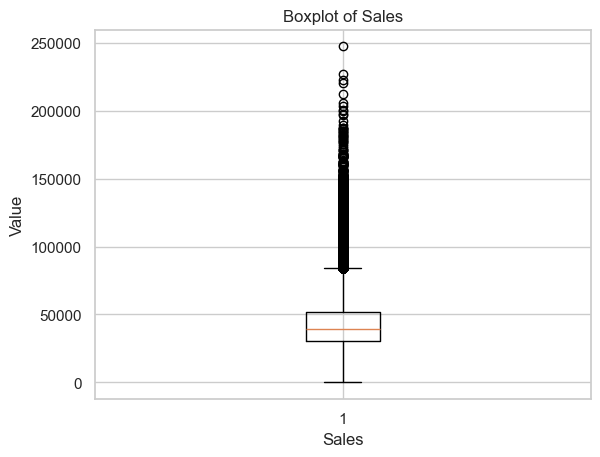

In [22]:
# Create a boxplot of the 'Sales' column
plt.boxplot(train['Sales'])

# Set the plot title and labels
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.ylabel('Value')

# Show the plot
plt.show()

In [23]:
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sales'])
for i in train['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train['Sales'] = train['Sales'].replace(i, med)

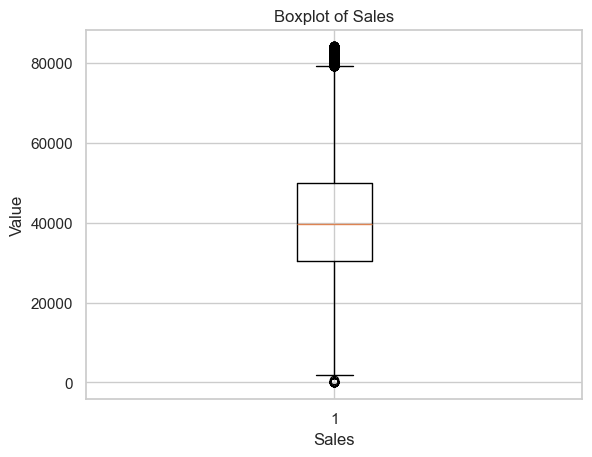

In [24]:
# Create a boxplot of the 'Sales' column
plt.boxplot(train['Sales'])

# Set the plot title and labels
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.ylabel('Value')

# Show the plot
plt.show()

In [25]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [26]:
#train = train.drop('ID', 1)

In [27]:
train[['Store_id','Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(int)

In [28]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [29]:
train = pd.get_dummies(train, columns=['Store_Type', 'Location_Type', 'Region_Code'])

In [30]:
# Extract date features
train['Date'] = pd.to_datetime(train['Date'])
train['DayOfWeek'] = train['Date'].dt.dayofweek
train['Month'] = train['Date'].dt.month
train['Quarter'] = train['Date'].dt.quarter
train['Year'] = train['Date'].dt.year

In [31]:
train.head()

,ID,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S1,Store_Type_S2,Store_Type_S3,...,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,DayOfWeek,Month,Quarter,Year
0,T1000001,1,2018-01-01,1,1,9,7011.84,1,0,0,...,0,0,1,0,0,0,0,1,1,2018
1,T1000002,253,2018-01-01,1,1,60,51789.12,0,0,0,...,0,0,1,0,0,0,0,1,1,2018
2,T1000003,252,2018-01-01,1,1,42,36868.20,0,0,1,...,0,0,1,0,0,0,0,1,1,2018
3,T1000004,251,2018-01-01,1,1,23,19715.16,0,1,0,...,0,0,1,0,0,0,0,1,1,2018
4,T1000005,250,2018-01-01,1,1,62,45614.52,0,1,0,...,0,0,0,0,0,1,0,1,1,2018


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

train['Sales'] = MinMaxScaler().fit_transform(np.array(train['Sales']).reshape(-1,1))

In [34]:
X = train.drop(columns=['ID','Date', 'Sales'])
y = train['Sales']

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [38]:

model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [39]:
y_pred = model.predict(X_valid)
y_pred

array([0.3772585 , 0.72979087, 0.48514417, ..., 0.3022422 , 0.5363042 ,
       0.56796104], dtype=float32)

In [40]:
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.06712746443212032


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)

# Calculate R-squared (R^2)
r2 = r2_score(y_valid, y_pred)

In [43]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.004506096481085579
Root Mean Squared Error (RMSE): 0.06712746443212032
Mean Absolute Error (MAE): 0.04384498123264669
R-squared (R^2): 0.8601394228926931


In [44]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [44]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [46]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [47]:
best_model = grid_search.best_estimator_

In [48]:
predictions = best_model.predict(X_valid)
mse = mean_squared_error(y_valid, predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0032813596257730516


In [49]:
mse = mean_squared_error(y_valid, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, predictions)

# Calculate R-squared (R^2)
r2 = r2_score(y_valid, predictions)

In [50]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.0032813596257730516
Root Mean Squared Error (RMSE): 0.06712746443212032
Mean Absolute Error (MAE): 0.03445119714022477
R-squared (R^2): 0.8981529017668364


In [51]:
feature_importance = model.feature_importances_

In [52]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})


In [53]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

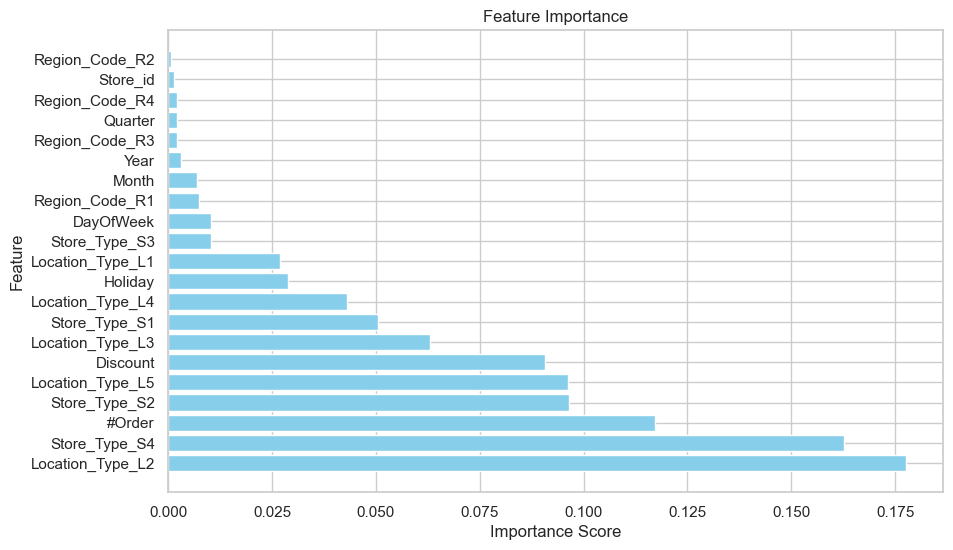

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [55]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [56]:
models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42))
]

In [192]:
stacking_model = StackingRegressor(estimators=models, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_valid)
stacking_mse = mean_squared_error(y_valid, stacking_preds)
print("Stacking Mean Squared Error (MSE):", stacking_mse)

Stacking Mean Squared Error (MSE): 0.002294696096073175


In [76]:
voting_model = VotingRegressor(estimators=models)
voting_model.fit(X_train, y_train)
voting_preds = voting_model.predict(X_valid)
voting_mse = mean_squared_error(y_valid, voting_preds)
print("Voting Mean Squared Error (MSE):", voting_mse)

Voting Mean Squared Error (MSE): 0.003439188908563023


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Calculate predictions for the test set
stacking_preds = stacking_model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_stacking = mean_absolute_error(y_valid, stacking_preds)

# Calculate Root Mean Squared Error (RMSE)
rmse_stacking = mean_squared_error(y_valid, stacking_preds, squared=False)

# Calculate R-squared (R^2)
r2_stacking = r2_score(y_valid, stacking_preds)

print("Stacking Model Metrics:")
print("MAE:", mae_stacking)
print("RMSE:", rmse_stacking)
print("R-squared:", r2_stacking)


Stacking Model Metrics:
MAE: 0.02560184455581286
RMSE: 0.04790298629598342
R-squared: 0.9287770420296548


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
from sklearn.model_selection import cross_val_score

In [78]:

mean_rmse = cv_rmse_scores.mean()
# Assuming your model is stored in the variable 'model'
# Assuming your features are stored in the variable 'X' and target variable is stored in 'y'

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation RMSE scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)

NameError: name 'cv_rmse_scores' is not defined